# MNS - CP - 2. Problem Set
_Assignment 2 (Hopfield Network)_

### Ahmed Abdalfatah - Mohammad Orabe - Sahand Sabahi Miab

## 1) Storing the weights

In [88]:
import numpy as np
import pandas as pd
import random

class HopfieldNetwork:
    """
    Hopfield network implementation that accepts patterns array,
    and evalutes weights based on these patterns.
      - number_of_weights = (n*(n-1))/2
      - Most operations are done on matrices/vectors
      - self.current_states holds the a snapshot of current states of the network at any moment.
    """
    def __init__(self, patterns):
        self.energies = []
        self.patterns = patterns
        self.weights = self.evaluate_weights()
        self.stable_patterns = self.evaluate_stable_patterns()
        self.current_states = []

    def evaluate_weights(self):
        """
        Evaluate weights of the network based on self.patterns
        This is done by dot product of the patterns matrix with
        its transpose.

        Returns matrix representing weights of connections between each two states.
        """
        weights_matrix = np.dot(np.array(self.patterns).transpose(), self.patterns)
        np.fill_diagonal(weights_matrix, 0)
        return weights_matrix

    def state_update(self, state_index):
        """
        Updates the state of the given state (by index) and current_states of the
        network.

        Returns sign function output of the dot product of weights and current_states.
        """
        return np.sign(np.dot(self.weights[state_index], self.current_states))
    
    def calculate_energy(self):
        """
        Calculates the energy of the network based on current_states, goes through each
        state and multiplies the weights vector with the current_states and its transpose.
        
        Returns the sum of energies of different states.
        """
        sum_per_state = []
        for state_index in range(len(self.current_states)):
            sum_per_state.append(np.dot(np.array(self.current_states).transpose(), np.dot(self.weights[state_index], self.current_states)))
        return np.array(sum_per_state).diagonal().sum() * -1
    
    def evaulate_pattern_stability(self, pattern, calculate_energy=False):
        """
        Evaluates the stability of the patterns.

        Returns:
            - boolean representing stability of given pattern
            - energies of this pattern (if calculate_energy bool is True)
        """
        state_energies = []
        self.current_states = pattern.copy()
        for state_index in random.sample(range(len(pattern)), len(pattern)):
            updated_state_value = self.state_update(state_index)
            self.current_states[state_index] = updated_state_value
            if calculate_energy:
                energy = self.calculate_energy()
                state_energies.append(energy)
        # print("Current states after this pattern: {}".format(self.current_states))
        matched = (self.current_states == pattern)
        print("stable: {}".format(matched))
        return [matched, state_energies]

    def evaluate_stable_patterns(self):
        """
        Goes through the network and calculates which patterns are stable.

        Returns array of stable patterns
        """
        stable_patterns = []
        for pattern in self.patterns:
            if self.evaulate_pattern_stability(pattern)[0]:
                stable_patterns.append(pattern)
        return stable_patterns
    
    def calculate_energies(self, pattern):
        """
        Returns energies calculated while updating the states
        of the network based on the given pattern.
        """
        stable, energies = self.evaulate_pattern_stability(pattern, calculate_energy=True)
        return energies

pattern_1 = [1, -1, 1, -1]
pattern_2 = [-1, 1, 1, 1]
pattern_3 = [-1, -1, -1, 1]

patterns = [pattern_1, pattern_2, pattern_3]
hopfield_network = HopfieldNetwork(patterns)
hopfield_network.stable_patterns

stable: True
stable: False
stable: False


[[1, -1, 1, -1]]

### Summary

Only the pattern [1, -1, 1, -1] **(pattern A)** is stable. Tested this by 
1. Updating the state for each unit using the given function (**chosen randomly**)
2. Tested if the "pattern state" matches the "evaluated state"
3. If 2 is True for all states, then a pattern is stable

### 2) What does the network converge to in states A/B/C

- **Pattern A** remains itself
- **Pattern B** changes to [-1, 1, -1, 1]
- **Pattern C** changes to [-1, 1, -1, 1]

stable: True
stable: False
stable: False


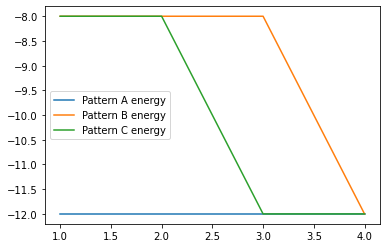

([-12, -12, -12, -12], [-8, -8, -8, -12], [-8, -8, -12, -12])

In [85]:
import matplotlib.pyplot as plt
  
pattern_1_energies = hopfield_network.calculate_energies(pattern_1)
pattern_2_energies = hopfield_network.calculate_energies(pattern_2)
pattern_3_energies = hopfield_network.calculate_energies(pattern_3)

t = [1,2,3,4]

plt.plot(t, pattern_1_energies, label = "Pattern A energy")
plt.plot(t, pattern_2_energies, label = "Pattern B energy")
plt.plot(t, pattern_3_energies, label = "Pattern C energy")
plt.legend()
plt.show()

pattern_1_energies, pattern_2_energies, pattern_3_energies

### Summary

- Stable pattern A has stable energy (-12)
- Unstable Pattern B starts at -8 and goes down to -12
- Unstable Pattern C starts at -8 and goes down to -12

### 3) Loading images and using hopfield network on it

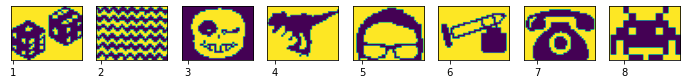

In [86]:
# Method to plot the images
def plot_images(images):
    nr_images = images.shape[0]
    fig = plt.figure()
    fig.set_figwidth(12)
    for m in range(nr_images):
        plt.subplot(1, 8, m+1)
        plt.imshow(images[m])
        plt.xticks([m+1])
        plt.yticks([])
    plt.show()

# Loading the images from file and plotting them
images = np.load("images.npz")["arr_0"]
plot_images(images)

In [87]:
# Reshaping the vectors by flatting them (8 arrays of 1200 elements each)
images_vectors = images.reshape(8, images.shape[1]*images.shape[2])

# Initializing the network using the 2d array of images
hopfield_network = HopfieldNetwork(images_vectors.tolist())
hopfield_network.weights

stable: True
stable: True
stable: False
stable: True
stable: True
stable: True
stable: True
stable: True


array([[0., 6., 6., ..., 6., 8., 8.],
       [6., 0., 8., ..., 4., 6., 6.],
       [6., 8., 0., ..., 4., 6., 6.],
       ...,
       [6., 4., 4., ..., 0., 6., 6.],
       [8., 6., 6., ..., 6., 0., 8.],
       [8., 6., 6., ..., 6., 8., 0.]])

### Summary

**Patterns stability:**

- 1st pattern: True
- 2nd pattern: True
- 3rd pattern: False
- 4th pattern: True
- 5th pattern: True
- 6th pattern: True
- 7th pattern: True
- 8th pattern: True
